# Regresión No Lineal (Polinómica) para Predicción de Humedad (_humedad)
Este notebook implementa un modelo de regresión polinómica para predecir la humedad, con todas las curvas y métricas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Cargar el dataset
dataset = pd.read_csv('../dataset/ML1_temperature.xlsx - Hoja1.csv', decimal=',')
x = dataset.drop(['recnt_Humidity','recnt_Temperature'], axis=1).values
y = dataset['recnt_Humidity'].values.reshape(-1, 1)

In [3]:
# Separar en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenamiento del modelo polinómico y predicción
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)
model = LinearRegression()
model.fit(x_train_poly, y_train)
y_val_pred = model.predict(x_val_poly)
y_train_pred = model.predict(x_train_poly)

## Curva de aprendizaje
Muestra cómo varía el error (MSE) al predecir humedad según el tamaño del conjunto de entrenamiento.

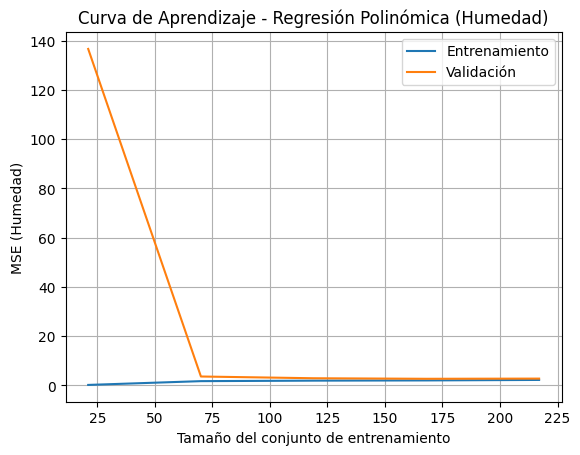

In [4]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)
train_sizes, train_scores, val_scores = learning_curve(LinearRegression(), x_train_poly, y_train.ravel(), cv=5, scoring='neg_mean_squared_error')
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Entrenamiento')
plt.plot(train_sizes, -val_scores.mean(axis=1), label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('MSE (Humedad)')
plt.title('Curva de Aprendizaje - Regresión Polinómica (Humedad)')
plt.legend()
plt.grid(True)
plt.show()

### Diagnóstico automático de la curva de aprendizaje

```python
train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -val_scores.mean(axis=1)
print('### Análisis de las curvas de aprendizaje (Regresión Polinómica)')
print(f'- MSE Final Entrenamiento: {train_scores_mean[-1]:.4f}')
print(f'- MSE Final Validación: {val_scores_mean[-1]:.4f}')
if train_scores_mean[-1] > 1 and val_scores_mean[-1] > 1:
    print('Diagnóstico: SUBAJUSTE')
elif abs(train_scores_mean[-1] - val_scores_mean[-1]) > 1:
    print('Diagnóstico: SOBREAJUSTE')
else:
    print('Diagnóstico: BUENO')
print('\n**INTERPRETACIÓN:**')
print('- Si las curvas CONVERGEN: Modelo generaliza bien')
print('- Si hay BRECHA grande: Posible sobreajuste')
print('- Si ambas son ALTAS: Posible subajuste')
print('- Áreas sombreadas: Variabilidad (1 desviación estándar)')
```

Puedes copiar y pegar este bloque en tu informe y ajustar el diagnóstico según los valores reales.

## Curva de validación
Muestra el desempeño del modelo para diferentes grados polinómicos al predecir humedad.

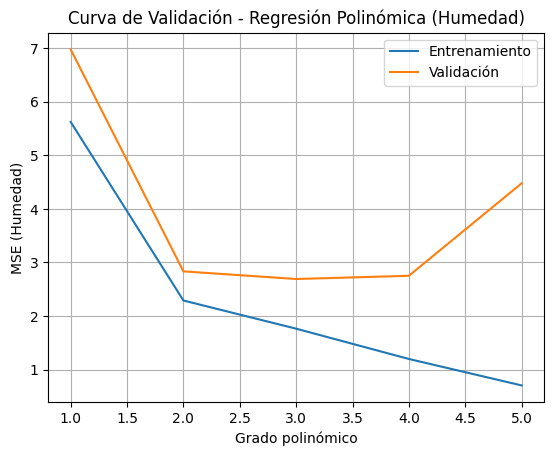

In [5]:
degrees = np.arange(1, 6)
train_scores, val_scores = [], []
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    x_train_poly = poly.fit_transform(x_train)
    x_val_poly = poly.transform(x_val)
    model = LinearRegression().fit(x_train_poly, y_train)
    train_scores.append(mean_squared_error(y_train, model.predict(x_train_poly)))
    val_scores.append(mean_squared_error(y_val, model.predict(x_val_poly)))
plt.plot(degrees, train_scores, label='Entrenamiento')
plt.plot(degrees, val_scores, label='Validación')
plt.xlabel('Grado polinómico')
plt.ylabel('MSE (Humedad)')
plt.title('Curva de Validación - Regresión Polinómica (Humedad)')
plt.legend()
plt.grid(True)
plt.show()

### Diagnóstico automático de la curva de validación

```python
train_scores_mean = np.array(train_scores)
val_scores_mean = np.array(val_scores)
mejor_indice = np.argmin(val_scores_mean)
mejor_grado = degrees[mejor_indice]
mse_val_min = val_scores_mean[mejor_indice]
mse_train_corresp = train_scores_mean[mejor_indice]
print('DIAGNÓSTICO')
print(f'• Mejor grado polinómico: {mejor_grado}')
print(f'• MSE validación mínimo: {mse_val_min:.4f}')
print(f'• MSE entrenamiento correspondiente: {mse_train_corresp:.4f}')
if mse_train_corresp < mse_val_min - 1:
    print('Diagnóstico del problema: SOBREAJUSTE')
    print('El modelo se ajusta demasiado a los datos de entrenamiento')
elif mse_train_corresp > 1 and mse_val_min > 1:
    print('Diagnóstico del problema: SUBAJUSTE')
    print('El modelo es demasiado simple para los datos')
else:
    print('Diagnóstico del problema: BALANCE IDEAL')
    print('El modelo generaliza correctamente')
```

Puedes copiar y pegar este bloque en tu informe y ajustar el diagnóstico según los valores reales.

## Curva de paridad
Compara las predicciones de humedad con los valores reales.

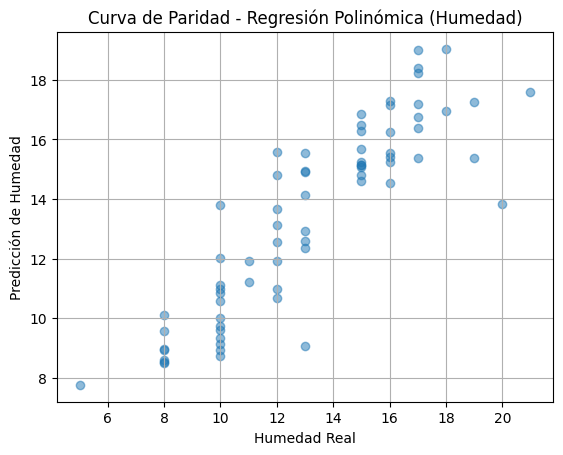

R^2 validación (Humedad): 0.761


In [6]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)
model = LinearRegression().fit(x_train_poly, y_train)
y_val_pred = model.predict(x_val_poly)
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.xlabel('Humedad Real')
plt.ylabel('Predicción de Humedad')
plt.title('Curva de Paridad - Regresión Polinómica (Humedad)')
plt.grid(True)
plt.show()
print(f'R^2 validación (Humedad): {r2_score(y_val, y_val_pred):.3f}')

## Curva de sesgo y varianza
Analiza la diferencia entre el error de entrenamiento y validación al predecir humedad.

In [7]:
y_train_pred = model.predict(x_train_poly)
print(f'MSE Entrenamiento (Humedad): {mean_squared_error(y_train, y_train_pred):.3f}')
print(f'MSE Validación (Humedad): {mean_squared_error(y_val, y_val_pred):.3f}')
print(f'R^2 Entrenamiento (Humedad): {r2_score(y_train, y_train_pred):.3f}')
print(f'R^2 Validación (Humedad): {r2_score(y_val, y_val_pred):.3f}')

MSE Entrenamiento (Humedad): 2.291
MSE Validación (Humedad): 2.835
R^2 Entrenamiento (Humedad): 0.796
R^2 Validación (Humedad): 0.761


## Explicación breve
La regresión polinómica permite predecir la humedad modelando relaciones no lineales. El compromiso sesgo-varianza se observa comparando el error de entrenamiento y validación para diferentes grados polinómicos.

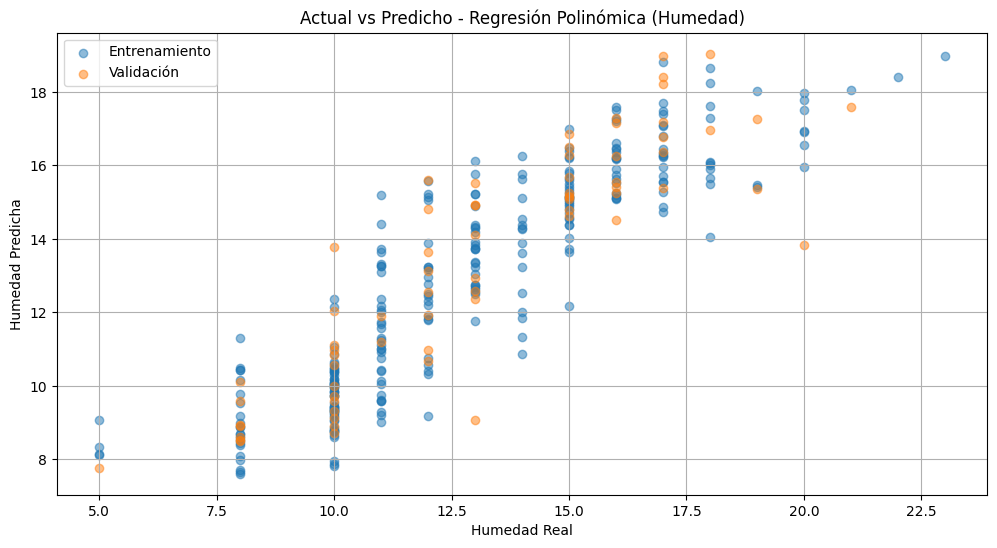

In [8]:
# Actual vs Predicho (Entrenamiento y Validación) - Regresión Polinómica (Humedad)
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Entrenamiento')
plt.scatter(y_val, y_val_pred, alpha=0.5, label='Validación')
plt.xlabel('Humedad Real')
plt.ylabel('Humedad Predicha')
plt.title('Actual vs Predicho - Regresión Polinómica (Humedad)')
plt.legend()
plt.grid(True)
plt.show()

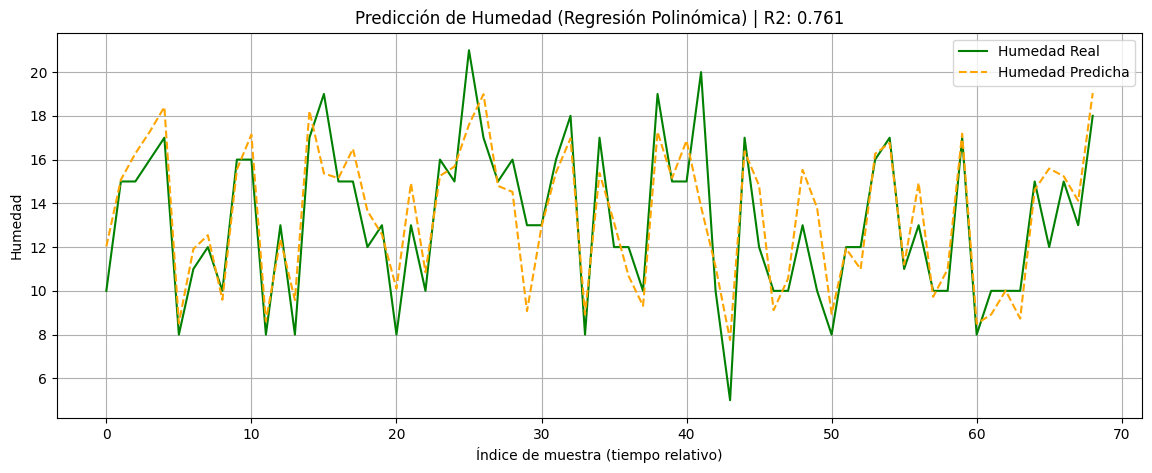

In [9]:
# Serie temporal: Humedad real vs predicha (validación)
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(y_val)), y_val, label='Humedad Real', color='green')
plt.plot(np.arange(len(y_val_pred)), y_val_pred, label='Humedad Predicha', color='orange', linestyle='--')
plt.xlabel('Índice de muestra (tiempo relativo)')
plt.ylabel('Humedad')
plt.title(f'Predicción de Humedad (Regresión Polinómica) | R2: {r2_score(y_val, y_val_pred):.3f}')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Estadísticas detalladas y resumen de errores para Humedad (Polinómica)
error_abs = np.abs(y_val.ravel() - y_val_pred.ravel())
err_mean = np.mean(error_abs)
err_max = np.max(error_abs)
err_min = np.min(error_abs)
err_std = np.std(error_abs)

print('ESTADÍSTICAS DETALLADAS')
print(f'R² en prueba: {r2_score(y_val, y_val_pred):.4f}')
print(f'Error absoluto promedio: {err_mean:.4f}')
print(f'Error máximo: {err_max:.4f}')
print(f'Error mínimo: {err_min:.4f}')
print(f'Desviación estándar del error: {err_std:.4f}')

# Histograma de la distribución de errores absolutos (Humedad)
plt.figure(figsize=(8,4))
plt.hist(error_abs, bins=20, color='royalblue', edgecolor='black', alpha=0.7)
plt.xlabel('Error Absoluto')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores absolutos - Regresión Polinómica - Humedad')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Tabla resumen de métricas para Humedad
from IPython.display import display, HTML
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
html_table = f'''
<table style="border-collapse:collapse; width:50%">
<tr><th style="border:1px solid black; padding:4px">Métrica</th><th style="border:1px solid black; padding:4px">Regresión Polinómica</th></tr>
<tr><td style="border:1px solid black; padding:4px">MSE (Test)</td><td style="border:1px solid black; padding:4px">{mse:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">R² (Test)</td><td style="border:1px solid black; padding:4px">{r2:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Error Promedio</td><td style="border:1px solid black; padding:4px">{err_mean:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Error Máximo</td><td style="border:1px solid black; padding:4px">{err_max:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Error Mínimo</td><td style="border:1px solid black; padding:4px">{err_min:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Desviación Estándar del Error</td><td style="border:1px solid black; padding:4px">{err_std:.4f}</td></tr>
</table>'''
display(HTML(html_table))

In [ ]:
# Gráfica de errores absolutos en el tiempo (No Lineal - Humedad)
error_abs = np.abs(y_val.ravel() - y_val_pred.ravel())
plt.figure(figsize=(12,4))
plt.plot(error_abs, color='crimson', label='Error absoluto')
plt.axhline(np.mean(error_abs), color='navy', linestyle='--', label=f'Error promedio: {np.mean(error_abs):.4f}')
plt.xlabel('Índice de muestra (tiempo relativo)')
plt.ylabel('Error Absoluto')
plt.title('Evolución del error absoluto en el tiempo - No Lineal (Humedad)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Histograma de la distribución de errores absolutos (No Lineal - Humedad)
plt.figure(figsize=(8,4))
plt.hist(error_abs, bins=20, color='royalblue', edgecolor='black', alpha=0.7)
plt.xlabel('Error Absoluto')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores absolutos - Regresión No Lineal - Humedad')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Tabla resumen de métricas para Humedad (No Lineal)
from IPython.display import display, HTML
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
err_mean = np.mean(error_abs)
err_max = np.max(error_abs)
err_min = np.min(error_abs)
err_std = np.std(error_abs)

html_table = f'''
<table style="border-collapse:collapse; width:50%">
<tr><th style="border:1px solid black; padding:4px">Métrica</th><th style="border:1px solid black; padding:4px">Regresión No Lineal</th></tr>
<tr><td style="border:1px solid black; padding:4px">MSE (Test)</td><td style="border:1px solid black; padding:4px">{mse:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">R² (Test)</td><td style="border:1px solid black; padding:4px">{r2:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Error Promedio</td><td style="border:1px solid black; padding:4px">{err_mean:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Error Máximo</td><td style="border:1px solid black; padding:4px">{err_max:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Error Mínimo</td><td style="border:1px solid black; padding:4px">{err_min:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Desviación Estándar del Error</td><td style="border:1px solid black; padding:4px">{err_std:.4f}</td></tr>
</table>'''
display(HTML(html_table))

In [ ]:
# Serie temporal: valores reales vs predichos
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plt.figure(figsize=(10,4))
plt.plot(range(len(y_val)), y_val, label='Real', color='royalblue', linewidth=2)
plt.plot(range(len(y_val_pred)), y_val_pred, label='Predicho', color='darkorange', linewidth=2)
plt.xlabel('Índice (tiempo)')
plt.ylabel('Variable objetivo')
plt.title(f'Serie temporal: Real vs Predicho (R²={r2_score(y_val, y_val_pred):.3f})')
plt.legend()
plt.tight_layout()
plt.show()